In [1]:
# Step 1 import all libraries
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
# to make this notebook's output identical at every run
np.random.seed(68)

In [2]:
# Step 2 import your dataset
# Loading the data from the file
def load_data(filename):
    return pd.read_csv(filename, index_col=False)

In [40]:
# Change the first line to  "nr del x y z temp"
# Using readlines()
file1 = open('big_bucket2.csv', 'r')
Lines = file1.readlines()
file1.close()

# writing to file replace the spaces with commas
file2 = open('bucket-1Temp.csv', 'w')

for line in Lines:
    line.rstrip()
    if("1TEMP" not in line):continue #Roomtemp
    line = str(re.sub('[^\d\.]', '', line))
    line = line[1:]
    line+= '\n'
    file2.write(line)

file2.close()

In [41]:
data1 = load_data("bucket-1Temp.csv")
data2 = load_data("bucket-2Temp.csv")

In [60]:
file1 = open('bucket-2Temp.csv', 'r')
Lines = file1.readlines()
file1.close()

file2 = open('bucket-2TempHour.csv', 'w')
sample = 1
averageList = []

for line in Lines:
    if(sample % 7200 == 0):
        line+= '\n'
        file2.write(str(sum(averageList) / len(averageList)) +'\n')
        averageList = []
    line.strip()
    if("temp" in line):continue
    averageList.append(float(line))
    sample = sample + 1

file2.close()

In [66]:
data1Hour = load_data("bucket-1TempHour.csv")
data2Hour = load_data("bucket-2TempHour.csv")

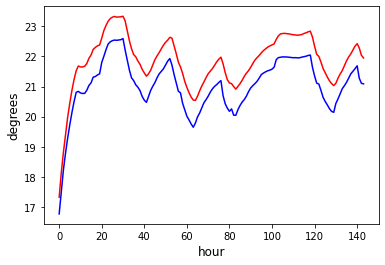

In [70]:
temppoints1Hour = data1Hour['temp']
temppoints2Hour = data2Hour['temp']

plt.xlabel('hour', fontsize=12)
plt.ylabel('degrees', fontsize=12)

plt.plot(temppoints1Hour, linestyle = 'solid', color='blue')
plt.plot(temppoints2Hour, linestyle = 'solid', color='red')
plt.show()